<a href="https://colab.research.google.com/github/soumeyamokhtari/google-ads-mysql-database/blob/main/energy_weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Impact on Energy Consumption and Production

This project analyses the combined effects of weather variables
(temperature, humidity, solar irradiance, and sunlight-related features)
on energy consumption and production patterns.

The dataset contains hourly observations with detailed meteorological
information and energy delta measurements.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('/content/Renewable Energy and Weather Conditions.xlsx')
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    196776 non-null  datetime64[ns]
 1   Energy delta[Wh]        196776 non-null  int64         
 2   GHI                     196776 non-null  float64       
 3   temp                    196776 non-null  float64       
 4   pressure                196776 non-null  int64         
 5   humidity                196776 non-null  int64         
 6   wind_speed              196776 non-null  float64       
 7   rain_1h                 196776 non-null  float64       
 8   snow_1h                 196776 non-null  float64       
 9   clouds_all              196776 non-null  int64         
 10  isSun                   196776 non-null  int64         
 11  sunlightTime            196776 non-null  int64         
 12  dayLength               196776

In [ ]:
# Extract time features from the 'Time' column
df['Hour'] = df['Time'].dt.hour
df['Month'] = df['Time'].dt.month

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)


**Exploratory Data Analysis (EDA)**

Energy delta by hour

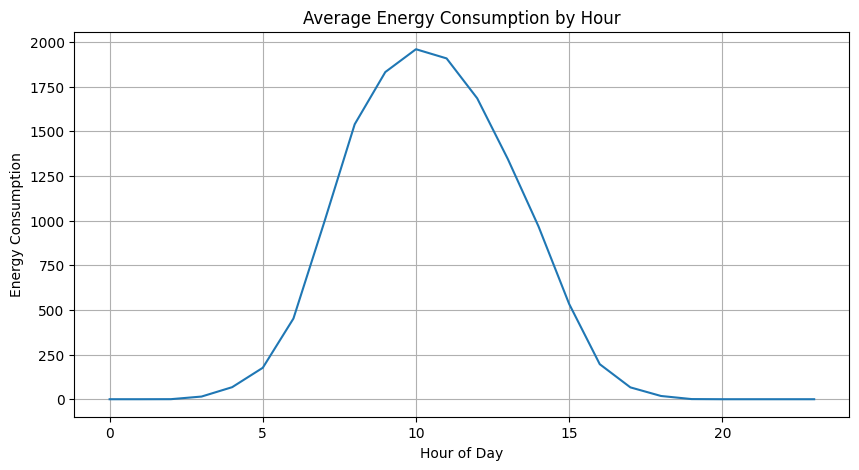

In [ ]:
hourly_avg = df.groupby('Hour')['Energy delta[Wh]'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_avg.index, hourly_avg.values)
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

 Energy delta by season

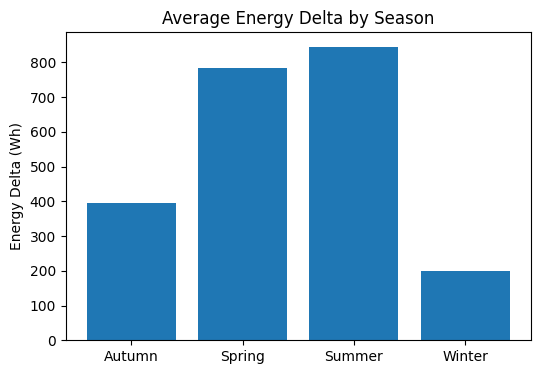

In [ ]:
season_avg = df.groupby('Season')['Energy delta[Wh]'].mean()

plt.figure(figsize=(6,4))
plt.bar(season_avg.index, season_avg.values)
plt.title('Average Energy Delta by Season')
plt.ylabel('Energy Delta (Wh)')
plt.show()


Temperature vs energy delta

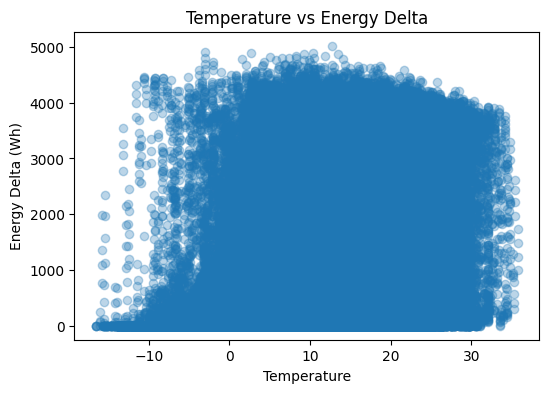

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['temp'], df['Energy delta[Wh]'], alpha=0.3)
plt.xlabel('Temperature')
plt.ylabel('Energy Delta (Wh)')
plt.title('Temperature vs Energy Delta')
plt.show()


Solar irradiance vs energy delta

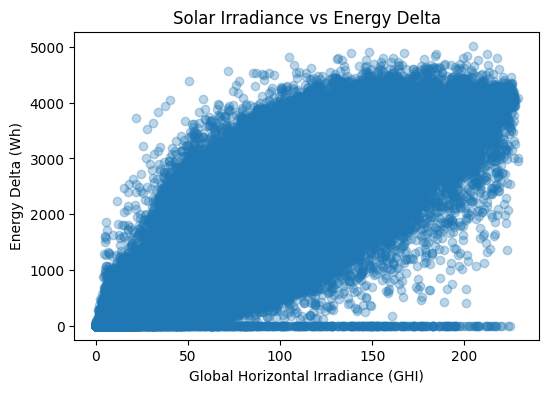

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['GHI'], df['Energy delta[Wh]'], alpha=0.3)
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Energy Delta (Wh)')
plt.title('Solar Irradiance vs Energy Delta')
plt.show()


**Correlation analysis**

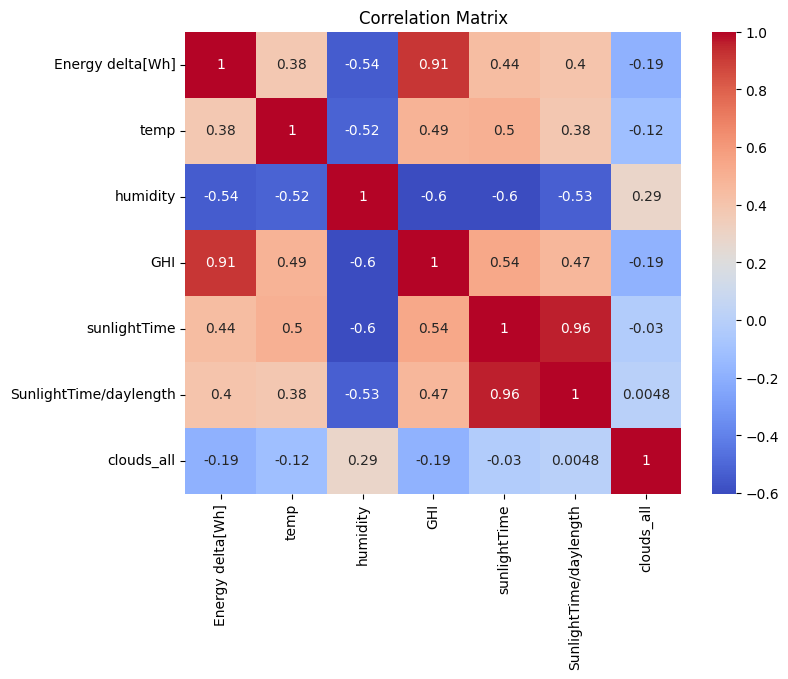

In [ ]:
features = [
    'Energy delta[Wh]', 'temp', 'humidity', 'GHI',
    'sunlightTime', 'SunlightTime/daylength', 'clouds_all'
]

corr = df[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Simple predictive model (ONE model only)

Prepare data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [ ]:
X = df[['temp', 'humidity', 'GHI', 'sunlightTime', 'clouds_all']]
y = df['Energy delta[Wh]']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train & evaluate

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

mae
